# bike shanring demand Exploratory Ananlytics Dictation

[bike-sharing/Exploratory Analytics.ipynb at master · dsleiter/bike-sharing](https://github.com/dsleiter/bike-sharing/blob/master/Exploratory%20Analytics.ipynb)

* 다른사람이 분석해 놓은 notebook을 따라해 보며 데이터를 탐색해 보고 연습함

* 위 데이터 는 https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset 데이터셋으로 분석하였고, 여기에서는 캐글의 데이터셋을 사용해 데이터를 탐색

* 위 데이터는 day와 time으로 나눈 데이터이고 여기에서 사용한 캐글 데이터는 날짜별로 나눈 데이터

In [149]:
from datetime import datetime

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# set defaults fot flots
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['axes.titlesize'] = 'x-large'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.labelweight'] = 'bold'

def scatterplot_kwargs(*, color=None):
    return{
        'linestyle' : 'None',
        'marker' : 'o',
        'color' : color,
        'markerdgecolor' : color
    }


Import the data and see what it looks like
데이터를 로드해서 어떻게 생겼는지 관찰

In [150]:
datafile = 'data/train.csv'
df = pd.read_csv(datafile, parse_dates=["datetime"])
df.head()

# df[date] = df["datetime"].dt.year + '-' +df["datetime"].dt.month + '-' df["datetime"].dt.day

for col in ['season', 'holiday', 'workingday', 'weather',]:
    df[col] = df[col].astype('category')
    
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month

df.sample(5)   

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
4005,2011-09-17 22:00:00,3,0,0,1,20.50,24.240,72,15.0013,31,112,143,2011,9
8247,2012-07-05 00:00:00,3,0,1,1,30.34,33.335,51,7.0015,17,71,88,2012,7
6780,2012-03-19 19:00:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549,2012,3
3727,2011-09-06 06:00:00,3,0,1,2,22.14,25.760,88,22.0028,0,72,72,2011,9
4079,2011-10-02 00:00:00,4,0,0,3,14.76,16.665,93,19.9995,4,43,47,2011,10


Data Fields
from [Bike Sharing Demand | Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [151]:
for c in df.columns:
    print('-------------')
    print('column: {} (dtype: {})'.format(c, df[c].dtype))
    print('')
    print('Description:')
    print(df.describe())
    print('')
    print('Up to 10 most frequent values:')
    print(df[c].value_counts().iloc[:10])

-------------
column: datetime (dtype: datetime64[ns])

Description:
              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count          year         month  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean     155.552177    191.574132   2011.501929      6.521495  
std      151.039033    181.144454   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count          year         month  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean     155.552177    191.574132   2011.501929      6.521495  
std      151.039033    181.144454      0.500019      3.444373  
min        0.000000      1.000000   2011.

# 시각화
선택 된 플롯들의 연관이 높은 데이터를 보여준다.

## 1. 일별 대여량의 수
    * 전체 대여량
    * 회원 대여량 / 비회원 대여량

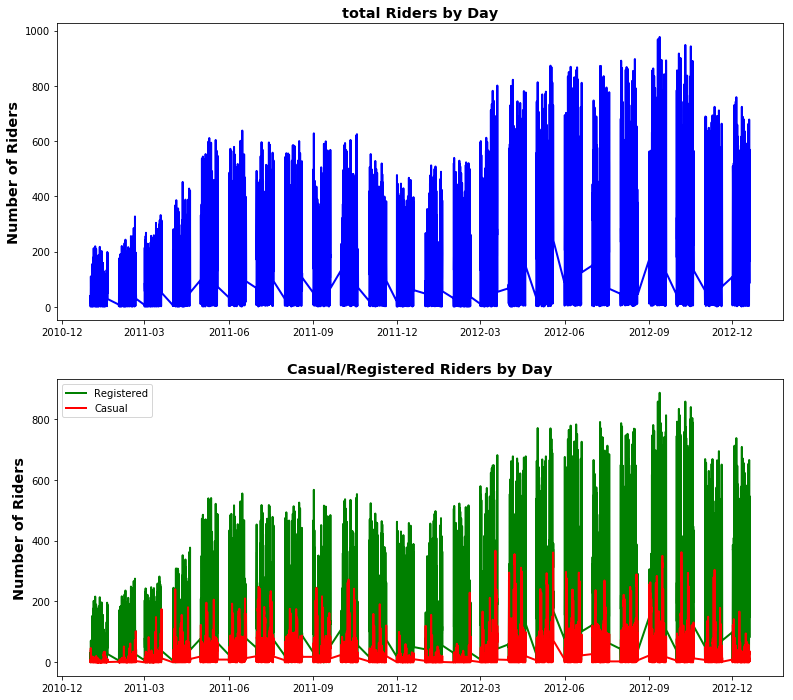

In [160]:
plt.figure(figsize=(13,12))
plt.subplot(211)
plt.plot(df['datetime'], df['count'], 'b')
plt.title('total Riders by Day')
plt.ylabel('Number of Riders')

plt.subplot(212)
plt.plot(df['datetime'], df['registered'], 'g')
plt.plot(df['datetime'], df['casual'],'r')
plt.title('Casual/Registered Riders by Day')
plt.ylabel('Number of Riders')
plt.legend(['Registered', 'Casual'], loc='upper left')


매일 자전거 대여량을 보여준다. 계절에 따라 수치가 달라지는 것 같지만, 가입자와 미가입자의 패턴이 약간 다르다는 것을 볼 수 있다. 특히 1~2월에 미가입자들은 자전거 대여량이 확연하게 줄어든다.

## 2. 온도와 날씨

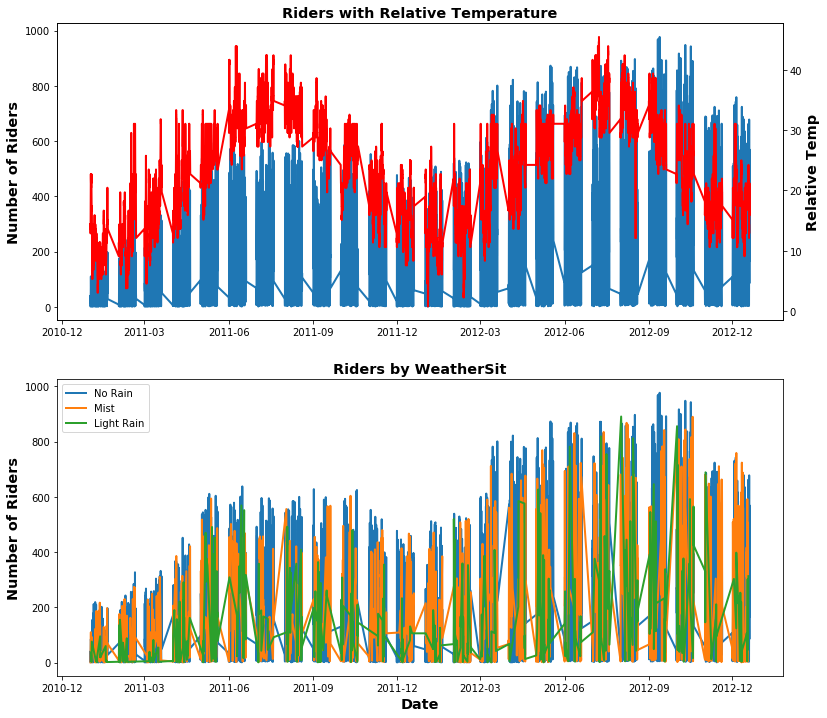

In [170]:
plt.figure(figsize=(13,12))
ax1 = plt.subplot(211)
plt.plot(df['datetime'], df['count'])
plt.title('Riders with Relative Temperature')
ax1.set_ylabel('Number of Riders')
# 수치의 기준이 다른 두가지 내용을 하나의 그래프에 표현
ax2 = ax1.twinx()
# df.head()
# 분포도에 대한 그래프를 표시해야 하는데 
# scatterplot_kwargs에서 오류가 나서 주석처리
# plt.plot(df['datetime'], df['atemp'], **scatterplot_kwargs(color='r'))
plt.plot(df['datetime'], df['atemp'], 'r')
ax2.set_ylabel('Relative Temp')
#ax1.set_ylim([0, 1e4])
#ax2.set_ylim([0, 1.0])

plt.subplot(212)
# df[df['weather'] == 1]
for weathersit,wcolor,label in zip([1,2,3], 
                                   ['b','g','r'],
                                   ['No Rain', 'Mist', 'Light Rain']):
    wsit_df = df[df['weather'] == weathersit]
# 산점도를 그려야 하는데 , **scatterplot_kwargs(color=wcolor) 을 추가시 오류가 나서 주석처리
#     plt.plot(wsit_df['datetime'], wsit_df['count'], label=label, **scatterplot_kwargs(color=wcolor))
    plt.plot(wsit_df['datetime'], wsit_df['count'], label=label)
plt.title('Riders by WeatherSit')
plt.xlabel('Date')
plt.ylabel('Number of Riders')
# plt.ylim([0, 1e4])
plt.legend(loc='upper left');

## 3. 워킹데이와 아닌 날의 대여량

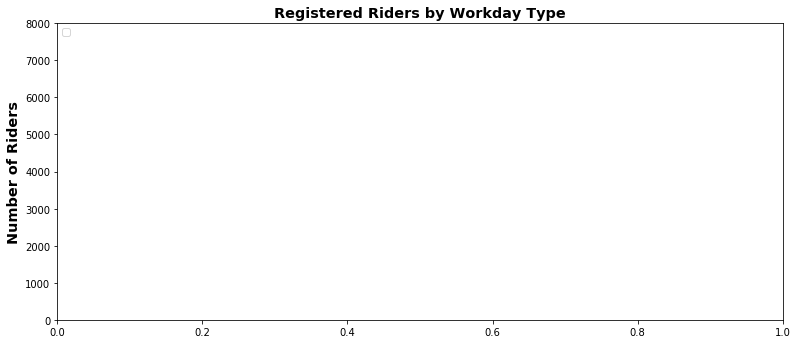

In [173]:
plt.figure(figsize=(13, 12))
plt.subplot(211)
for workingday, lcolor in zip([0,1],['b','r']):
    wd_df = df[df['workingday'] == workingday]
#     plt.plot(wd_df['datetime'], wd_df['registered'], **scatterplot_kwargs(color=lcolor))
plt.title('Registered Riders by Workday Type')
plt.ylabel('Number of Riders')
plt.ylim([0, 8e3])
plt.legend(['non-workday', 'workday'], loc='upper left')  

## Correlation and T-Tests

In [172]:
cols = ['registered', 'casual', 'count']
rows = ['year', 'month', 'temp', 'atemp', 'humidity', 'windspeed']
df.corr()[cols].loc[rows]

,registered,casual,count
year,0.264265,0.145241,0.260403
month,0.169451,0.092722,0.166862
temp,0.318571,0.467097,0.394454
atemp,0.314635,0.462067,0.389784
humidity,-0.265458,-0.348187,-0.317371
windspeed,0.091052,0.092276,0.101369
